In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

data = pd.read_csv('/content/drive/My Drive/Vis Project/players_22.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import math

cnt = 0
a = []

# for d, p in zip(data['defending'], data['player_positions']):
#   if math.isnan(d):
#     cnt += 1
#     if p not in a:
#       a.append(p)
# print(cnt)

print(data['pace'][5])
for col in data.columns:
  if data.isna().sum()[col] > 0:
    a.append(col)
    cnt += 1

# for d in data['player_positions']:
#     d = d.split(', ')
#     for dd in d:
#       if dd not in a: a.append(dd) 
#     # a.append(d[0])
#     # cnt += 1

print(data.isna().sum()['league_name'])
print(data.isna().sum()['release_clause_eur'])

print(data.info())
data = data.dropna(subset=['league_name'], how='all')
data = data.dropna(subset=['value_eur'], how='all')

print(data.info())

print(data.isna().sum()['wage_eur'])
print(data.isna().sum()['value_eur'])
print(data.isna().sum()['club_position'])
# print(data.isna().sum()['pace'])
# print(data.isna().sum()['passing'])

# print(data.isna().sum()['nation_position'])

print(cnt)
# print((data['club_position'] == 'RES').sum())
a

nan
61
1176
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.2+ MB
None
0
0
0
27


['value_eur',
 'wage_eur',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url']

In [ ]:
inx1 = data.columns.get_loc('ls')
inx2 = data.columns.get_loc('gk')
print(inx2 - inx1)

def clean_col(x):
  if type(x) == int:
    return x
  else:
    return int(x.split('+')[0]) if '+' in x else int(x.split('-')[0])

for i in range(inx1, inx2+1):
    data[data.columns[i]] = data[data.columns[i]].apply(clean_col)

data['player_positions'] = data['player_positions'].apply(lambda x: x.split(', ')[0])

26


In [ ]:
# def set_pos(x):
positions = {
    'GK': (25, 5),
    'LWB': (8, 20),
    'LB': (16, 14),
    'CB': (25, 14),
    'RB': (34, 14),
    'RWB': (42, 20),
    'LM': (12, 28),
    'CDM': (25, 20),
    'CM': (25, 28),
    'RM': (38, 28),
    'LW': (12, 35),
    'CAM': (25, 35),
    'RW': (38, 35),
    'ST': (25, 40),
    'CF': (25, 45),
}

data['x'] = [0 for _ in range(0, len(data))]
data['y'] = [0 for _ in range(0, len(data))]

x_pos = []
y_pos = []
for i in range(len(data)):
  x_pos.append(positions[data.iloc[i]['player_positions']][0])
  y_pos.append(positions[data.iloc[i]['player_positions']][1])

data['x'] = x_pos
data['y'] = y_pos

In [ ]:
data

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,x,y
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,93,78000000.0,320000.0,34,...,50,61,19,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,38,35
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60,61,19,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,25,40
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,91,91,45000000.0,270000.0,36,...,53,60,20,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,25,40
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,LW,91,91,129000000.0,270000.0,29,...,50,62,20,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,12,35
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,CM,91,91,125500000.0,350000.0,30,...,69,75,21,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,25,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46,48,15,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png,25,20
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44,48,14,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,25,28
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45,47,12,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,25,28
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26,32,15,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,25,40


34


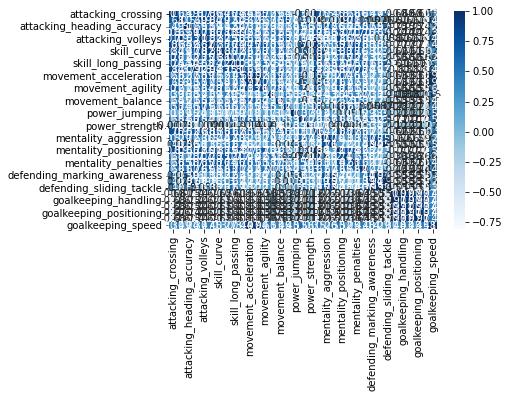

In [4]:
features = {}
# print(data['attacking_crossing'])

# attacking_crossing
# goalkeeping_speed

inx1 = data.columns.get_loc('attacking_crossing')
inx2 = data.columns.get_loc('goalkeeping_speed')
print(inx2 - inx1)

def clean_col(x):
  if type(x) == int:
    return x
  else:
    return int(x.split('+')[0]) if '+' in x else int(x.split('-')[0])

for i in range(inx1, inx2+1):
    # print(data.columns[inx1])
    features[data.columns[i]] = data[data.columns[i]]
    # features[data.columns[i]] = features[data.columns[i]].apply(clean_col)

# features['attacking_crossing']  

features = pd.DataFrame(features)
corr = features.corr()
# sb.heatmap(corr, cmap="Blues", annot=True)

s = corr.unstack()
so = s.sort_values(kind="quicksort")

so = so > 0.85
corr_atts = []
atts = {}
for i in range(len(so)):
  if so[i] and so.index[i][0] != so.index[i][1]:
    if (so.index[i][1], so.index[i][0]) not in corr_atts:
      corr_atts.append(so.index[i])
      if so.index[i][0] not in atts.keys():
        atts[so.index[i][0]] = 1
      else:
        atts[so.index[i][0]] += 1
      if so.index[i][1] not in atts.keys():
        atts[so.index[i][1]] = 1
      else:
        atts[so.index[i][1]] = atts[so.index[i][1]] + 1

# corr_features = {}
# for att in list(atts.keys())[:12]:
#   corr_features[att] = features[att]
# corr_features = pd.DataFrame(corr_features)

# corr = corr_features.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
# corr

In [8]:
atts = {k: v for k, v in sorted(atts.items(), key=lambda item: item[1])}
atts_sorted = list(atts.keys())
# print(atts_sorted)

# def check_isCorr(final_attributes, corr_attributes):
#   still_corrs = []
#   for fa in final_attributes:
#     for fa1 in final_attributes:
#       if (fa, fa1) in corr_attributes:
#         still_corrs.append((fa, fa1))
#       if (fa1, fa) in corr_attributes:
#         still_corrs.append((fa1, fa))
#   return still_corrs

def check_isCorr(attribute, corr_list, corr_attributes):
  for corr_att in corr_list:
    if (attribute, corr_att) not in corr_attributes and (corr_att, attribute) not in corr_attributes:
      return False
  return True

final_atts = []
corr_atts_groups = [list(ca) for ca in corr_atts]

for att in atts_sorted:
  for i in range(len(corr_atts_groups)):
    if att not in corr_atts_groups[i] and check_isCorr(att, corr_atts_groups[i], corr_atts):
      corr_atts_groups[i].append(att)

for ca in corr_atts_groups:
  max = 0
  final_att = None
  for sub_ca in ca:
    if atts_sorted.index(sub_ca) > max:
      max = atts_sorted.index(sub_ca)
      final_att = sub_ca
  final_atts.append(final_att)

# for ca in corr_atts:
#   if atts_sorted.index(ca[0]) > atts_sorted.index(ca[1]):
#     final_atts.append(ca[0])
#     # if ca[1] in final_atts:
#     #   final_atts.remove(ca[1])
#   else:
#     final_atts.append(ca[1])
#     # if ca[0] in final_atts:
#     #   final_atts.remove(ca[0])

# final_atts = set(final_atts)

# while len(check_isCorr(final_atts, corr_atts)) != 0:
#   still_corrs = check_isCorr(final_atts, corr_atts)
#   for cor in still_corrs:
#     if atts_sorted.index(cor[0]) < atts_sorted.index(cor[1]):
#       if cor[0] in final_atts:
#         final_atts.remove(cor[0])
#     else:
#       if cor[1] in final_atts:
#         final_atts.remove(cor[1])
#   print(final_atts)
#   print(ca)
#   print(' ****************   \n')

# for fa in corr_atts_groups:
#   print(fa)

for fa in corr_atts_groups:
  print(fa)
for fa in final_atts:
  print(fa)
print(len(set(final_atts)))
print(len(atts))
new_atts = set([x for x in features.columns if x not in list(atts.keys())] + final_atts)
len(new_atts)

['mentality_penalties', 'attacking_volleys', 'attacking_finishing']
['mentality_penalties', 'attacking_finishing', 'attacking_volleys']
['skill_dribbling', 'power_long_shots', 'mentality_positioning']
['skill_curve', 'skill_dribbling']
['skill_dribbling', 'attacking_short_passing', 'skill_ball_control']
['skill_curve', 'skill_fk_accuracy']
['attacking_crossing', 'skill_dribbling']
['attacking_volleys', 'mentality_positioning', 'attacking_finishing', 'power_long_shots']
['skill_ball_control', 'mentality_positioning', 'skill_dribbling']
['attacking_volleys', 'power_long_shots', 'attacking_finishing', 'mentality_positioning']
['power_long_shots', 'mentality_positioning', 'attacking_volleys', 'attacking_finishing']
['skill_long_passing', 'attacking_short_passing']
['attacking_finishing', 'attacking_volleys', 'mentality_penalties']
['attacking_finishing', 'power_long_shots', 'attacking_volleys', 'mentality_positioning']
['attacking_finishing', 'mentality_positioning', 'attacking_volleys', '

19

In [ ]:
data = data.drop(columns=[x for x in list(atts.keys()) if x not in new_atts])

In [ ]:
data['index'] = range(1, len(data) + 1)

In [ ]:
data

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,x,y,index
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,93,78000000.0,320000.0,34,...,61,19,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,38,35,1
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,61,19,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,25,40,2
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,91,91,45000000.0,270000.0,36,...,60,20,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,25,40,3
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,LW,91,91,129000000.0,270000.0,29,...,62,20,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,12,35,4
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,CM,91,91,125500000.0,350000.0,30,...,75,21,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,25,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,48,15,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png,25,20,19161
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,48,14,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,25,28,19162
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,47,12,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,25,28,19163
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,32,15,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,25,40,19164


In [ ]:
data.to_csv('/content/drive/My Drive/Vis Project/players_22_v1.csv')